# Taking a quick look at a single CMIP5 model output file using OpenDAP

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Direct link to files/dataset online

Unfortunately no direct easy method to download files automatically. There is a way to run a bash script to get them all at once but it requries a login, mtf. Under 'Project' on the left, select CMIP5 and hit 'Search'. All available data sets that cover this period are displayed. [CMIP5 Datalink](https://esgf-node.llnl.gov/search/cmip5/)

Using the above link to the data portal, under 'Project' select CMIP5 and under 'Product' select output1 and then click the search button. A whole list of options should come up. It shouls show this information:

1.	
project=CMIP5, model=CMCC-CM, Centro Euro-Mediterraneo per I Cambiamenti Climatici, experiment=10- or 30-year run initialized in year 1985, time_frequency=mon, modeling realm=atmos, ensemble=r1i2p1, version=20121008 
Description: CMCC-CM model output prepared for CMIP5 10- or 30-year run initialized in year 1985 
Data Node: aims3.llnl.gov 
Version: 20121008 
Total Number of Files (for all variables): 42
Full Dataset Services:  	[ Show Metadata ]   [ List Files ]   [ WGET Script ]    [ LAS ]    [ Globus Download ]

Click on 'List files'. As said above, there isn't an easy method to download all 42 of the files associated with this output without logging in or installing Globus Connect Personal but, there is an easy way to look at just one of the files using OpenDAP. Click on 'OpenDAP Download' that is next to any the first file. This automatically downloads that netCDF file but has '.nc.dods' after the name. 

I copied the address of the download and removed the '.dod' at the end and that is what is below named as the url

In [8]:
url = 'http://aims3.llnl.gov/thredds/dodsC/cmip5_css02_data/cmip5/output1/CMCC/CMCC-CM/decadal1985/mon/atmos/Amon/r1i2p1/cct/1/cct_Amon_CMCC-CM_decadal1985_r1i2p1_198511-199512.nc'
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 240, lon: 480, time: 122)
Coordinates:
  * time       (time) datetime64[ns] 1985-11-16 ... 1995-12-16T12:00:00
  * lat        (lat) float64 -89.43 -88.68 -87.94 -87.19 ... 87.94 88.68 89.43
  * lon        (lon) float64 0.0 0.75 1.5 2.25 3.0 ... 357.0 357.8 358.5 359.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    cct        (time, lat, lon) float32 ...
Attributes:
    institution:                     CMCC - Centro Euro-Mediterraneo per i Ca...
    institute_id:                    CMCC
    experiment_id:                   decadal1985
    source:                          CMCC-CM
    model_id:                        CMCC-CM
    forcing:                         Nat,Ant,GHG,SA,TO,Sl
    parent_experiment_id:            N/A
    parent_experiment_rip:           N/A
    branch_time:                     0.0
    contact:                         Silvio Gualdi (gualdi@bo.ingv.it)
    history:                         Model output postprocessed with CDO 2012...
    comment:                         The ocean is initialized with full value...
    references:                      model described in the documentation at ...
    initialization_method:           2
    physics_version:                 1
    tracking_id:                     43c36c35-4b6f-4967-bb36-00a3c039ac6b
    product:                         output
    experiment:                      10- or 30-year run initialized in year 1985
    frequency:                       mon
    creation_date:                   2012-03-22T15:29:53Z
    Conventions:                     CF-1.4
    project_id:                      CMIP5
    table_id:                        Table Amon (27 April 2011) a5a1c518f52ae...
    title:                           CMCC-CM model output prepared for CMIP5 ...
    parent_experiment:               N/A
    modeling_realm:                  atmos
    realization:                     1
    cmor_version:                    2.7.1
    DODS_EXTRA.Unlimited_Dimension:  time

In [9]:
cct = ds['cct'].values 
# for some reason, putting .values here allowed me to not have problems accesing the 
# data when I tried to plot, without it I would get an error saying NetCDF4: Access failure  
cct[1,::].shape 

(240, 480)

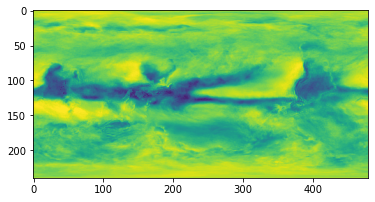

In [10]:
plt.imshow(cct[1,:,:])